In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
320,2014,DODGE,DART GT,MID-SIZE,2.4,4,M6,X,10.2,7.0,8.8,32,202
152,2014,BUICK,REGAL eASSIST,MID-SIZE,2.4,4,AS6,X,9.6,6.5,8.2,34,189
331,2014,DODGE,JOURNEY FFV,SUV - SMALL,3.6,6,A6,E,18.9,12.9,16.2,17,259
847,2014,NISSAN,JUKE AWD,STATION WAGON - SMALL,1.6,4,AV,Z,9.3,7.9,8.7,32,200
548,2014,JAGUAR,F-TYPE S CONVERTIBLE,TWO-SEATER,3.0,6,AS8,Z,12.2,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
467,3.6,6,12.6,290
1000,2.7,4,11.8,271
677,3.5,6,11.8,271
686,5.4,8,16.0,368
349,6.8,10,21.2,488
928,6.6,12,15.6,359
383,3.7,6,13.4,308
461,5.3,8,17.3,277
431,2.5,4,10.4,239


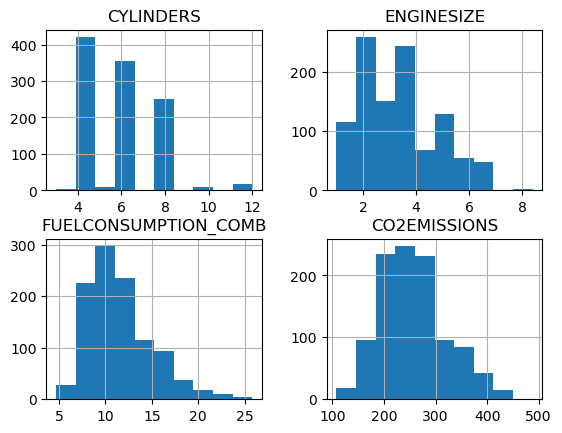

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

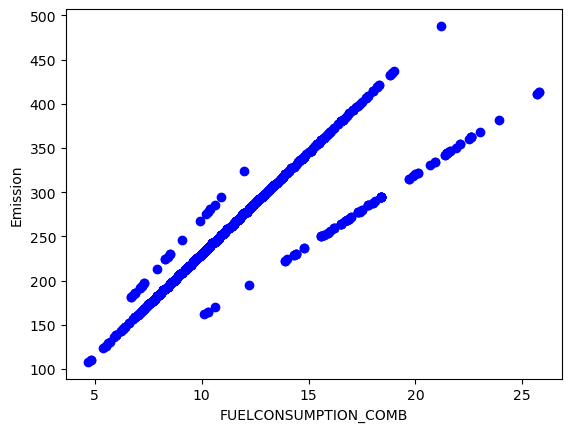

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

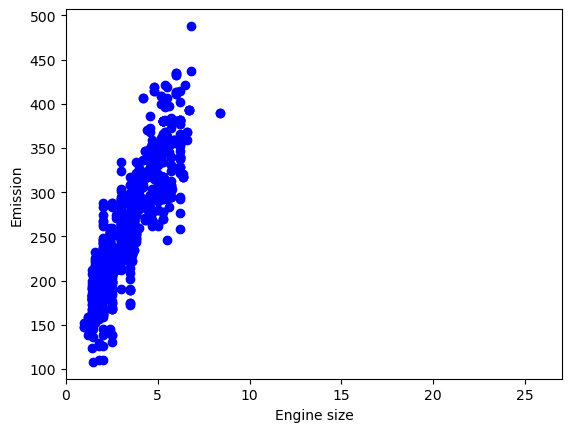

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

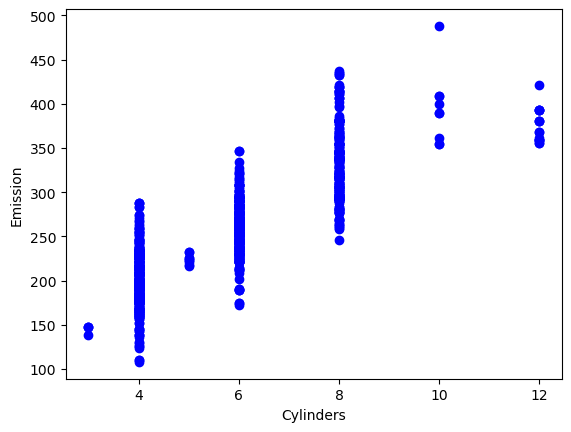

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [15]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [30]:
type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (853,), (853,))

In [31]:
from sklearn import linear_model
regressor=linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [32]:
print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


In [33]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_pred = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


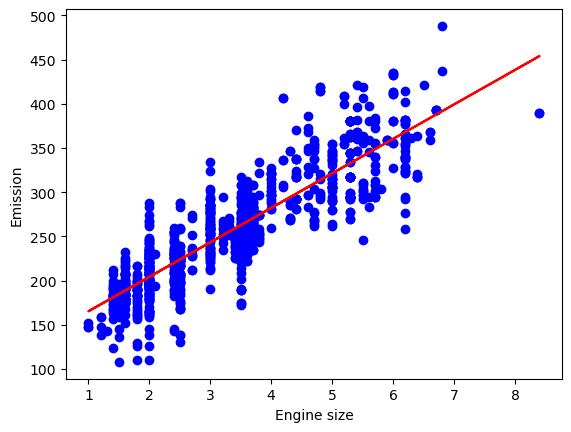

In [35]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,regressor.coef_ * X_test + regressor.intercept_,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()    

In [36]:
X =cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1,1), y_train)


LinearRegression()

In [38]:
y_pred = regr.predict(X_test.reshape(-1,1))


In [39]:
MSE=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error:",MSE)

Mean_Squared_Error: 797.4346310097205
